# Sales Forecasting with Time Series (ARIMA)

"""
This project applies time series forecasting using the ARIMA model to predict monthly sales.
It includes data visualization, decomposition, parameter tuning, and model evaluation.
"""

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
# Load data
df = pd.read_csv('sales_data.csv', parse_dates=['Date'], index_col='Date')
df.head()

# Plot sales trend
df['Sales'].plot(figsize=(12, 5), title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'sales_data.csv'

In [4]:
import pandas as pd
import numpy as np

# Generate monthly dates
dates = pd.date_range(start='2018-01-01', periods=60, freq='M')

# Generate synthetic sales data
np.random.seed(0)
sales = np.random.randint(200, 500, size=len(dates)) + np.arange(len(dates)) * 5

# Create DataFrame
df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

df.to_csv('sales_data.csv')  # Save to file (optional)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_10864\2438512777.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2018-01-01', periods=60, freq='M')


,Sales
Date,
2018-01-31,372
2018-02-28,252
2018-03-31,327
2018-04-30,407
2018-05-31,471


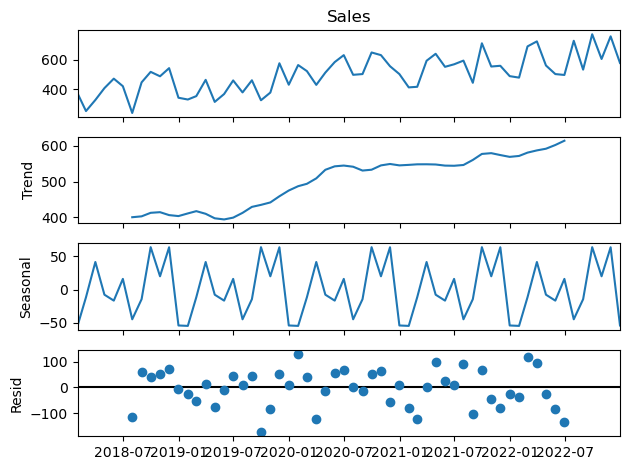

In [5]:
decomposition = seasonal_decompose(df['Sales'], model='additive')
decomposition.plot()
plt.show()

In [6]:
# ARIMA(p,d,q) — sample parameters (adjust via grid search)
model = ARIMA(df['Sales'], order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -352.905
Date:                Tue, 01 Jul 2025   AIC                            715.810
Time:                        14:33:23   BIC                            726.198
Sample:                    01-31-2018   HQIC                           719.865
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6158      0.460      1.339      0.181      -0.285       1.517
ar.L2         -0.2416      0.173     -1.394      0.163      -0.581       0.098
ma.L1         -1.3749      0.468     -2.940      0.0

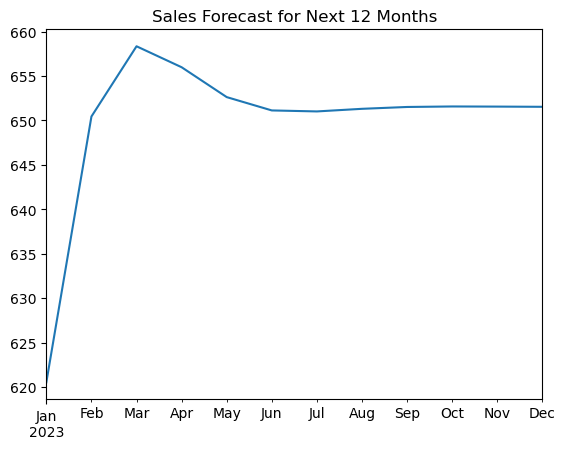

In [7]:
forecast = model_fit.forecast(steps=12)
forecast.plot(title='Sales Forecast for Next 12 Months')
plt.show()

In [8]:
# Example using split
train = df['Sales'][:-12]
test = df['Sales'][-12:]

model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()
pred = model_fit.forecast(steps=12)

rmse = np.sqrt(mean_squared_error(test, pred))
print(f'RMSE: {rmse:.2f}')

C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


RMSE: 126.91


- ARIMA improved forecast accuracy